In [1]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt",delimiter = " ",
                   header = None, names = ("data","time","ir","lidar"))
data

,data,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [2]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


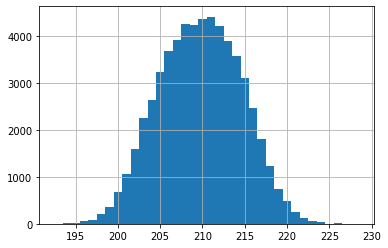

In [3]:
import matplotlib.pyplot as plt

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [4]:
print(min(data["lidar"]))

193


In [5]:
# 平均の表現方法は色々ある
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1 , mean2)

209.73713297619855 209.73713297619855


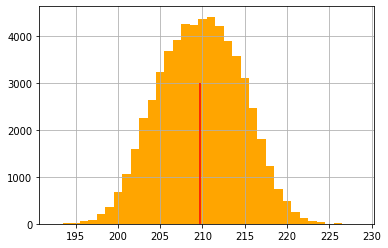

In [6]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left',color = "orange")
plt.vlines(mean1,ymin=0,ymax=3000,color="red")
plt.show()

In [7]:
#定義から計算
zs = data["lidar"].values# zsにlidar情報を入れる
mean = sum(zs) / len(zs)
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs)) #標本分散
unbiased_var = sum(diff_square)/(len(zs)-1)

print(sampling_var , unbiased_var)

#pandas
pandas_sampling_var = data["lidar"].var(ddof = 0) #標本分散
pandas_default_var = data["lidar"].var() #デフォルト（不偏分散）
print(pandas_sampling_var , pandas_default_var)

#Numpy version
import numpy as np
numpy_default_var = np.var(data["lidar"])
numpy_unbiased_var = np.var(data["lidar"],ddof = 1)
print(numpy_default_var , numpy_unbiased_var)

23.407709770274106 23.40810659855441
23.407709770274106 23.40810659855441
23.407709770274106 23.40810659855441


In [8]:
import math

#定義より
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

#pandas
pandas_stddev = data["lidar"].std()

print(stddev1 , stddev2 , pandas_stddev)

4.838151482774605 4.83819249292072 4.83819249292072


In [14]:
freqs = pd.DataFrame(data["lidar"].value_counts())# 各センサ値の頻度

freqs.transpose()#横向き出力
#,index = ["a","b","c"]

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [ ]:
freqs["probs"] = freqs["lidar"] / len(data["lidar"])
print(len(data["lidar"]))
freqs.transpose()

In [ ]:
sum(freqs["probs"])

In [ ]:
freqs["probs"].sort_index().plot.bar()
plt.show()
# 縦軸：確率 横軸：縦軸に対応するセンサ値
# 確率分布

In [ ]:
def drawing():
    # n:選ぶ個数 weithts = "probs":
    return freqs.sample(n = 1,weights = "probs").index[0]
drawing()
# センサ値

In [ ]:
samples = [drawing() for i in range(len(data))]# samplesには色々なセンサ値が入っていく それを何回も
#samples = [drawing() for i in range(100)]
simulated = pd.DataFrame(samples,columns = ["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p),color = "orange",align = "left")
plt.show()

In [ ]:
def p(z,mu = 209.7,dev = 23.4):
    return math.exp(-(z-mu)**2 / (2*dev)) / math.sqrt(2*math.pi * dev)
# p(z)の値が得た平均とばらつきから、zの確率を表現できる

In [ ]:
zs = range(190,230)
ys = [p(z) for z in zs]# gaussianp(z)において、mu,sigmaに近いものは大きく、遠いものは小さい値が取れる
plt.plot(zs,ys)
plt.show()

In [ ]:
def prob(z,width = 0.5):
    return width * (p(z - width) + p(z + width)) #台形則

zs = range(190,230) # 横軸
ys = [prob(z) for z in zs] # 縦軸 190~230

plt.bar(zs,ys,color = "red", alpha = 0.3) # alphaで透明化  グラフの指定 頻度を用いた確率
f = freqs["probs"].sort_index() # zsが小さい順に並べ替え
#print(f)
plt.bar(f.index,f.values,color = "blue",alpha = 0.3) # センサ値の頻度から求めた確率のグラフ
plt.show()

In [ ]:
from scipy.stats import norm
# ガウス分布の新たな描き方
zs = range(190,230)
ys = [norm.pdf(z,mean1,stddev1) for z in zs]# norm.pdf()というgaussian関数が用意されてる

plt.plot(zs,ys)
plt.show()

In [ ]:
zs = range(190,230)
ys = [norm.cdf(z,mean1,stddev1) for z in zs]# norm.cdf()という累積分布関数が用意されている

plt.plot(zs,ys,color = "red")
plt.show()

In [ ]:
zs = range(190,230)
ys = [norm.cdf(z + 0.5,mean1,stddev1) - norm.cdf(z - 0.5,mean1,stddev1) for z in zs]
plt.bar(zs,ys)
plt.show()


In [ ]:
import random

samples = [random.choice([1,2,3,4,5,6]) for i in range(10000)]
sum(samples) / len(samples)

In [ ]:
9